# 模型的过拟合和欠拟合

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

学习曲线绘制

In [2]:
data = pd.read_csv(r'E:\Machine_learning_2019\data.csv')

In [3]:
X = data[['x1','x2']]
y = data['y']

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
estimator = LogisticRegression()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2)

In [8]:
from sklearn.model_selection import learning_curve

In [9]:
def draw_learning_curve(x,y,estimator,num_trainings,title):
    train_size,train_scores,test_scores = learning_curve(estimator,x,y,train_sizes=np.linspace(0.1,1,num_trainings))
    train_scores_mean = np.mean(train_scores,1)
    train_scores_std = np.std(train_scores,1)
    test_scores_mean = np.mean(test_scores,1)
    test_scores_std = np.std(test_scores,1)
    
    plt.grid()
    plt.title(title)
    plt.xlabel("training examples")
    plt.ylabel("scores")
    
    plt.plot(train_scores_mean,'o-',color='g',label='training scores')
    plt.plot(test_scores_mean,'o-',color='y',label='testing scores')
    
    plt.legend(loc='best')
    
    plt.show()

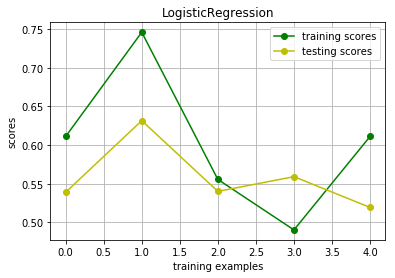

In [10]:
draw_learning_curve(X,y,estimator,5,title='LogisticRegression')

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
estimator = GradientBoostingClassifier()

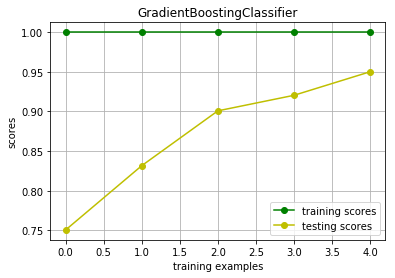

In [13]:
draw_learning_curve(X,y,estimator,5,title='GradientBoostingClassifier')

In [14]:
from sklearn.svm import SVC

In [15]:
estimator = SVC(kernel='rbf',gamma=1000)

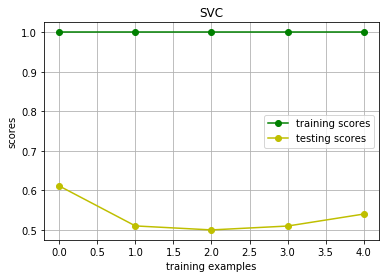

In [16]:
draw_learning_curve(X,y,estimator,5,'SVC')

模型选择

In [17]:
#网格搜索
from sklearn.model_selection import GridSearchCV

In [18]:
#超参数选择
parameters = {'kernel':['poly','rbf'],'C':[0.1,1,10]}

In [19]:
#评分机制
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
score = make_scorer(f1_score)

In [20]:
model = SVC()

In [21]:
#组合评分机制和参数
grid_obj = GridSearchCV(model,parameters,scoring=score)

In [22]:
grid_fit = grid_obj.fit(X,y)

In [23]:
best_fit = grid_fit.best_estimator_

In [24]:
best_fit

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)